In [3]:
import pandas as pd
epochs=[]
training_loss=[]
training_mse=[]
validation_loss=[]
validation_mse=[]
home_dir="/home/amorelli/r_estimate/B_maps_white_noise/results_11_6_23/"
with open(home_dir+'2085833.out', 'r') as f:
    lines = f.readlines()
i=0
while i< len(lines):
    line=lines[i].strip() #remove the blank line after the line
    line=line.split() #split accordin to separator; default = " "
    try:
        if line[0]=='Epoch' and i<len(lines)-1:
            epoch=''
            for char in line[1]:
                if char == "/":
                    break
                else:
                    epoch+=char
            epoch=int(epoch)
            epochs.append(epoch)
            i+=1
            line=lines[i].strip()
            line=line.split()
            for j in range(len(line)):
                if line[j]=="loss:":
                    training_loss.append(float(line[j+1]))
                elif line[j]=="val_loss:":
                    validation_loss.append(float(line[j+1]))
    except:
        print("void line")
    finally:
        pass
    i+=1
d={"epochs":epochs}
d["loss"]=training_loss
d["val_loss"]=validation_loss
df=pd.DataFrame(d)
print(df)
df.to_csv(home_dir+'loss_from_out.txt', index=True, sep=' ')
        
#print(epochs)
#f.close() i don't need to call it if i use with open

void line
void line
     epochs    loss  val_loss
0         1  0.1730    0.1140
1         2  0.1145    0.1193
2         3  0.1114    0.1014
3         4  0.1084    0.0998
4         5  0.1060    0.1011
..      ...     ...       ...
195     196  0.0537    0.1220
196     197  0.0538    0.1227
197     198  0.0536    0.1222
198     199  0.0536    0.1220
199     200  0.0531    0.1247

[200 rows x 3 columns]


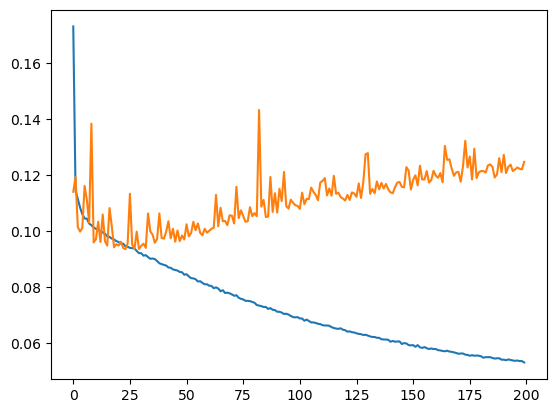

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(len(training_loss)),training_loss)
plt.plot(range(len(training_loss)),validation_loss)